In [43]:
# pip install git+https://github.com/LucianoPereiraValenzuela/ECC_2025_testing.git 

In [44]:
import numpy as np 
import matplotlib.pyplot as plt 
from qiskit import QuantumCircuit
from qiskit.circuit import random_circuit 
from qiskit.quantum_info import SparsePauliOp, Statevector 
from qiskit.primitives import StatevectorEstimator, Estimator 
from qiskit.circuit import ParameterVector 
from qiskit_algorithms import VQE
from qiskit_algorithms.optimizers import SPSA

El Variational Quantum Eigensolver (VQE) puede ser aplicado para estudíar sistemas cuánticos complejos. Consideremos el modelo de Schwinger, el cual describe la creacion y aniquilación de electrones y positrones. Este modelo debe su nombre a Julian Seymour Schwinger, ganador del premio Nobel en física en 1965, y es muy estudiado como modelo de juguete en Cronodinámica Cuántica. Supongamos que tenemos una region del espacio unidimensional donde hay campo electromagnético, y que discretizamos esta región en $N/2$ sitios donde colocamos partículas cargadas, es decir, electrones o positrones. Cada uno de estos sitios estará representado por dos qubit, siendo el estado $|00\rangle$ el vacío, el $|10\rangle$ un electron, el $|01\rangle$ un positron, y $|11\rangle$ un electrón y un positrón. Estas partículas interactúan entre ellas debido a su carga y al campo electromagnético externo. El Hamiltoniano que describe esta situación es:

$$ H = \sum_{j=0}^{N-2}\left( \sigma_+^{(j)}\sigma_-^{(j+1)} +\sigma_-^{(j)}\sigma_+^{(j+1)} \right) + \frac{m}{2}\sum_{j=0}^{N-1}(-1)^j\sigma_z^{(j)} + g\sum_{j=0}^N L_j^2 $$

El primer termino es responsable de la interacción $w$ de las partículas, el segundo depende de la masa $m$ de las partículas, y el último es el campo electromagnetico externo $g$, donde
$$ L_j = - \frac{1}{2}\sum_{l=0}^{j-1} \left( \sigma_z^{(l)}+(-I)^l \right).$$

Supongamos que $w=g=1$ y que $N=2$. En este caso el Hamiltoniano se reduce a,
$$ H = I + \sigma_x^{(1)}\sigma_x^{(2)} + \sigma_y^{(1)}\sigma_y^{(2)} - \frac{1}{2}\sigma_z^{(1)}+\frac{1}{2}\sigma_z^{(1)}\sigma_z^{(2)} + \frac{m}{2}( \sigma_z^{(2)} - \sigma_z^{(1)}) $$

__Desafio:__ Construya un VQE que encuentre el estado de mínima energía del modelo de Schwinger para $N=2$. La función debe tener por input la masa $m$ de las partículas, y debe tener como output la energía mínima $E$.

In [45]:
def VQE4Schwinger( m, plot=True ):

    #Opciones por default
    E = 0

    ### Escriba su solución acá ##

    H = SparsePauliOp( [ 'II', 'XX', 'YY', 'IZ', 'ZZ', 'ZI', 'IZ' ], 
                        [1,1,1,-.5,.5,m/2,-m/2] )

    theta = ParameterVector('theta',6)
    var_ansatz = QuantumCircuit(2)
    var_ansatz.ry(theta[0],0)
    var_ansatz.rz(theta[1],0)
    var_ansatz.cx(0,1)
    var_ansatz.ry(theta[2],0)
    var_ansatz.rz(theta[3],0)
    var_ansatz.ry(theta[4],1)
    var_ansatz.rz(theta[5],1)

    optimizer = SPSA()

    counts = []
    values = []
    def store_intermediate_result(eval_count, parameters, mean, std):
        counts.append(eval_count)
        values.append(mean)

    quantum_solver = VQE( Estimator(), var_ansatz, optimizer, 
                            callback=store_intermediate_result )
    np.random.seed(0)
    result = quantum_solver.compute_minimum_eigenvalue(operator=H)
    E = result.eigenvalue.real 

    if plot:
        plt.plot( counts, values )
        plt.xlabel('Evaluaciones')
        plt.ylabel('Energía')

    ##############################

    return E

C:\Users\lucia\AppData\Local\Temp\ipykernel_4628\4101153073.py:29: DeprecationWarning: The class ``qiskit.primitives.estimator.Estimator`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseEstimatorV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Estimator` class is `StatevectorEstimator`.
  quantum_solver = VQE( Estimator(), var_ansatz, optimizer,


np.float64(-1.5377126321295265)

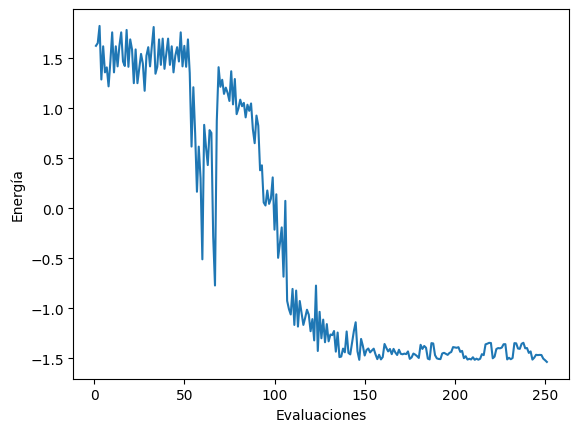

In [46]:
E = VQE4Schwinger(0) 
E

Este Hamiltoniano exhibe una transición de fase para $m=-1/2$. En este punto el estado de mínima energía es $(|01\rangle-|10\rangle)/\sqrt{2}$, es decir, existe un 50% probabilidad de que la partícula sea un electrón y un 50% de que sea un positrón. Este es un estado inestable, así que decae a un estado con masa negativa o positiva. Para masas negativas tenemos positrones con 100% probabilidad, mientras que para masas positivas tenemos electrones con 100% de probabilidad.

C:\Users\lucia\AppData\Local\Temp\ipykernel_4628\4101153073.py:29: DeprecationWarning: The class ``qiskit.primitives.estimator.Estimator`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseEstimatorV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Estimator` class is `StatevectorEstimator`.
  quantum_solver = VQE( Estimator(), var_ansatz, optimizer,
C:\Users\lucia\AppData\Local\Temp\ipykernel_4628\4101153073.py:29: DeprecationWarning: The class ``qiskit.primitives.estimator.Estimator`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseEstimatorV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Estimator` class is `StatevectorEstimator`.
  quantum_solver = VQE( Estimator(), var_ansatz, optimizer,
C:\Users\lucia\AppData\Local\Temp\ip

Text(0, 0.5, 'Energía')

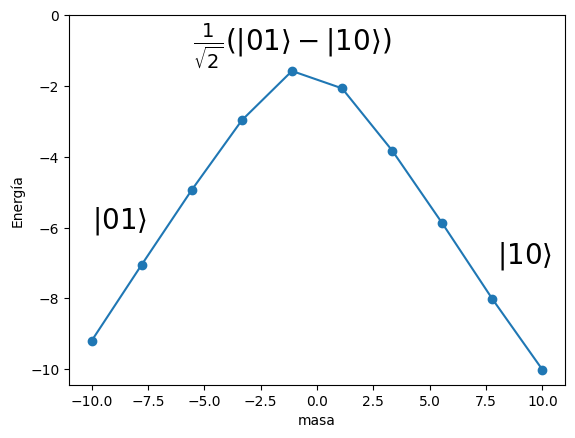

In [47]:
ms     =  np.linspace( -10, 10, 10) 
E_vs_m = [ VQE4Schwinger(m, False) for m in ms ]
plt.plot( ms, E_vs_m, '-o' )
plt.text( -10, -6, r'$|01\rangle$', fontsize=20 )
plt.text( 8, -7, r'$|10\rangle$', fontsize=20 ) 
plt.text( -5.5, -1, r'$\frac{1}{\sqrt{2}}(|01\rangle-|10\rangle)$', fontsize=20 )
plt.ylim(top=0)
plt.xlabel('masa')
plt.ylabel('Energía')

Hasta ahora hemos usado el VQE para estimar el estado de mínima energía. Sin embargo, este también puede ser utilizado para estimar estados excitados. Para esto utilizaremos un el Concurrent VQE. Este, se basa en minimizar la función objetivo:
$$ \bar{E}(\theta) = \langle 00 | U(\theta)^\dagger H U(\theta) |00\rangle + \langle 01 | U(\theta)^\dagger H U(\theta) |10\rangle. $$
Esta función objetivo puede estimarse introduciendo un qubit auxiliar, y preparando el circuito variacional
$$ |\bar{\psi}(\theta)\rangle = |0\rangle\otimes U(\theta)|00\rangle + |1\rangle\otimes U(\theta)|10\rangle, $$
y midiendo $H$ sobre los dos primeros qubits

In [48]:
def CVQE4Schwinger( m, plot=True ):

    #Opciones por default
    E = 0

    ### Escriba su solución acá ##

    H = SparsePauliOp( [ 'III', 'IXX', 'IYY', 
                        'IIZ', 'IZZ', 'IZI', 'IIZ' ], 
                        [1,1,1,-.5,.5,m/2,-m/2] )

    theta = ParameterVector('theta',6)

    var_ansatz = QuantumCircuit(3)
    var_ansatz.h(1)
    var_ansatz.cx(1,2)
    var_ansatz.ry(theta[0],0)
    var_ansatz.rz(theta[1],0)
    var_ansatz.cx(0,1)
    var_ansatz.ry(theta[2],0)
    var_ansatz.rz(theta[3],0)
    var_ansatz.ry(theta[4],1)
    var_ansatz.rz(theta[5],1)

    optimizer = SPSA(maxiter=500)

    counts = []
    values = []
    def store_intermediate_result(eval_count, parameters, 
                                    mean, std):
        counts.append(eval_count)
        values.append(mean)

    quantum_solver = VQE( Estimator(), var_ansatz, optimizer, 
                            callback=store_intermediate_result,
                            )
    np.random.seed(0)
    result = quantum_solver.compute_minimum_eigenvalue(
                            operator=H )
    E = result.eigenvalue.real 
    params = result.optimal_point

    groud_state = QuantumCircuit(3)
    groud_state.ry(theta[0],0)
    groud_state.rz(theta[1],0)
    groud_state.cx(0,1)
    groud_state.ry(theta[2],0)
    groud_state.rz(theta[3],0)
    groud_state.ry(theta[4],1)
    groud_state.rz(theta[5],1)
    E0 = Estimator().run( groud_state, H, params  
                            ).result().values[0]

    excited_state = QuantumCircuit(3)
    excited_state.x(1)
    excited_state.ry(theta[0],0)
    excited_state.rz(theta[1],0)
    excited_state.cx(0,1)
    excited_state.ry(theta[2],0)
    excited_state.rz(theta[3],0)
    excited_state.ry(theta[4],1)
    excited_state.rz(theta[5],1)
    E1 = Estimator().run( excited_state, H, params  
                            ).result().values[0]
    
    if plot:
        plt.plot( counts, values )
        plt.xlabel('Evaluaciones')
        plt.ylabel('Energía')

    ##############################

    return np.sort([ E0, E1 ])

C:\Users\lucia\AppData\Local\Temp\ipykernel_4628\3810061720.py:34: DeprecationWarning: The class ``qiskit.primitives.estimator.Estimator`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseEstimatorV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Estimator` class is `StatevectorEstimator`.
  quantum_solver = VQE( Estimator(), var_ansatz, optimizer,
C:\Users\lucia\AppData\Local\Temp\ipykernel_4628\3810061720.py:51: DeprecationWarning: The class ``qiskit.primitives.estimator.Estimator`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseEstimatorV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Estimator` class is `StatevectorEstimator`.
  E0 = Estimator().run( groud_state, H, params
C:\Users\lucia\AppData\Local\Temp\ipykernel_4628\

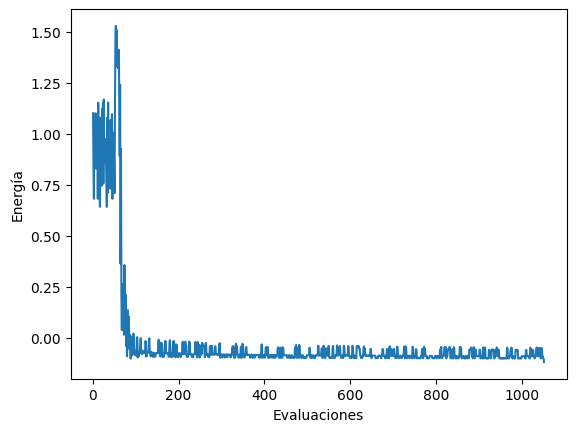

In [49]:
E0, E1 = CVQE4Schwinger( 0 ) 

C:\Users\lucia\AppData\Local\Temp\ipykernel_4628\3810061720.py:34: DeprecationWarning: The class ``qiskit.primitives.estimator.Estimator`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseEstimatorV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Estimator` class is `StatevectorEstimator`.
  quantum_solver = VQE( Estimator(), var_ansatz, optimizer,
C:\Users\lucia\AppData\Local\Temp\ipykernel_4628\3810061720.py:51: DeprecationWarning: The class ``qiskit.primitives.estimator.Estimator`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseEstimatorV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Estimator` class is `StatevectorEstimator`.
  E0 = Estimator().run( groud_state, H, params
C:\Users\lucia\AppData\Local\Temp\ipykernel_4628\

Text(0, 0.5, 'Energía')

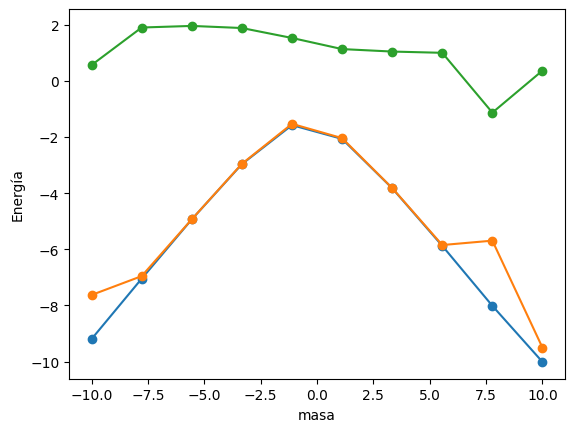

In [50]:
E0E1_vs_m = np.array([ CVQE4Schwinger(m, False) for m in ms ])
plt.plot( ms, E_vs_m, '-o' )
plt.plot( ms, E0E1_vs_m, '-o' )
plt.xlabel('masa')
plt.ylabel('Energía')

In [51]:
m = -10
H = SparsePauliOp( [ 'II', 'XX', 'YY', 'IZ', 'ZZ', 'ZI', 'IZ' ], 
                        [ 1, 1, 1, -.5, .5, m/2, -m/2 ] )

np.linalg.eigh( H.to_matrix() )[0], np.linalg.eigh( H.to_matrix() )[1].round(1)

(array([-9.20824392,  1.        ,  2.        , 10.20824392]),
 array([[ 0. +0.j,  1. +0.j,  0. +0.j,  0. +0.j],
        [-1. +0.j,  0. +0.j,  0. +0.j,  0.1+0.j],
        [ 0.1+0.j,  0. +0.j,  0. +0.j,  1. +0.j],
        [ 0. +0.j,  0. +0.j,  1. +0.j,  0. +0.j]]))